In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

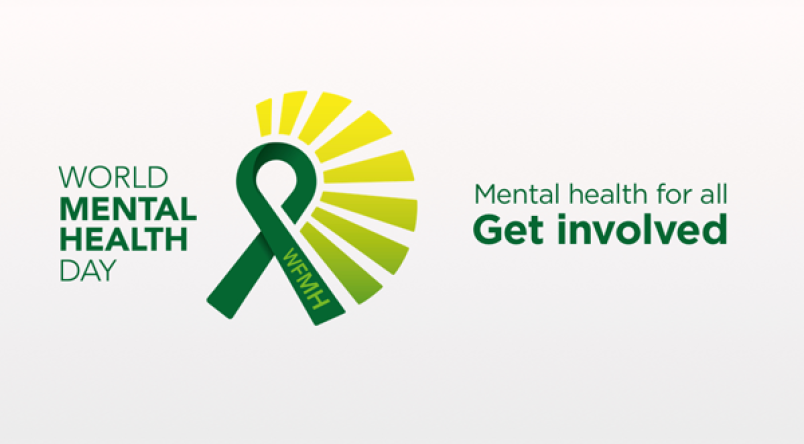

In [8]:
from IPython.display import Image
Image(filename='world-mental-health-day.png')

In [9]:
mental_health = pd.read_csv('world_mental_health_day.csv')

In [10]:
mental_health.head()

,TWEET,COMMENTS,LIKES,RETWEETS
0,Tomorrow is #WorldMentalHeathDay I am reminde...,1,56,14
1,Free tickets to the Inc. 5000 Vision Conferenc...,NaN,1,2
2,. @DrDavidTranter Discusses the importance of...,NaN,8,6
3,"To quote @DrSue22 ""feeling positive socially...",2,8,4
4,I learned this over again this weekend in a mo...,NaN,3,NaN


In [11]:
mental_health.shape

(272, 4)

In [12]:
mental_health.isnull().sum()

TWEET         0
COMMENTS    226
LIKES        91
RETWEETS    148
dtype: int64

In [13]:
wmhd = mental_health['TWEET']

In [14]:
wmhd.shape

(272,)

In [15]:
type(wmhd)

pandas.core.series.Series

In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
import spacy

In [18]:
wmhd.head()

0    Tomorrow is #WorldMentalHeathDay  I am reminde...
1    Free tickets to the Inc. 5000 Vision Conferenc...
2    . @DrDavidTranter  Discusses the importance of...
3    To quote  @DrSue22  "feeling positive socially...
4    I learned this over again this weekend in a mo...
Name: TWEET, dtype: object

In [19]:
tweets = []

for tweet in wmhd:
    tweets.append(tweet)

In [20]:
sentences = []

for twt in tweets:
    snts = twt.split()
    sentences.append(snts)

In [22]:
words = []

for i in sentences:
    for k in i:
        words.append(k)

In [23]:
words[:15]

['Tomorrow',
 'is',
 '#WorldMentalHeathDay',
 'I',
 'am',
 'reminded',
 'everybody',
 'that',
 'if',
 'you',
 'have',
 'been',
 'struggling,',
 'everybody',
 'else']

In [24]:
# words is a list of all the words that the tweets consists of

In [25]:
len(words)

8291

# HASHTAGS

In [26]:
hshtgs = []
words_list = []

for j in words:
    if j.startswith('#'):
        hshtgs.append(j)
    else:
        words_list.append(j)        

In [27]:
len(hshtgs)

557

In [28]:
hshtgs[:15]

['#WorldMentalHeathDay',
 '#wellbeing',
 '#WorldMentalHeathDay',
 '#MentalIllnessAwarenessWeek',
 '#WorldMentalHeathDay',
 '#EYFS',
 '#WorldMentalHeathDay',
 '#WorldMentalHeathDay',
 '#MentalHealth',
 '#MusicIndustry',
 '#WorldMentalHeathDay',
 '#bsjpshe',
 '#helloyellow',
 '#WorldMentalHeathDay',
 '#ItsOkayToNotBeOkay']

In [29]:
hshtgs = [x.lower() for x in hshtgs]

In [30]:
# # Removing the '#' from the hashtags

main_tags = []

for tgs in hshtgs:
    tgs = tgs.replace('#',"")
    main_tags.append(tgs)

In [31]:
main_tags[:11]

['worldmentalheathday',
 'wellbeing',
 'worldmentalheathday',
 'mentalillnessawarenessweek',
 'worldmentalheathday',
 'eyfs',
 'worldmentalheathday',
 'worldmentalheathday',
 'mentalhealth',
 'musicindustry',
 'worldmentalheathday']

In [32]:
tags_str = []

for sr in main_tags:
    sr = str(sr)
    tags_str.append(sr)

In [33]:
# Removing Punctuations from the 'tags' list which consists of hashtags

import re
tags_str = [re.sub(r'[^A-Za-z0-9]+','', x) for x in tags_str]

In [34]:
from wordcloud import WordCloud

In [35]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(tags_str))

# HASHTAGS WORDCLOUD

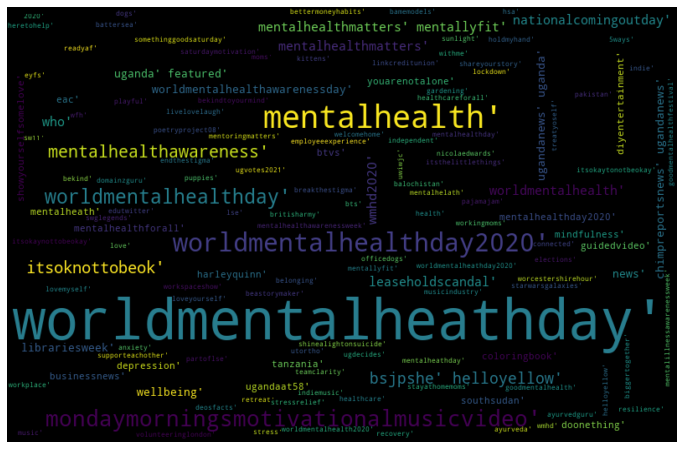

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('wmhd_hashtag_wordcloud.png', dpi=100)
plt.show()

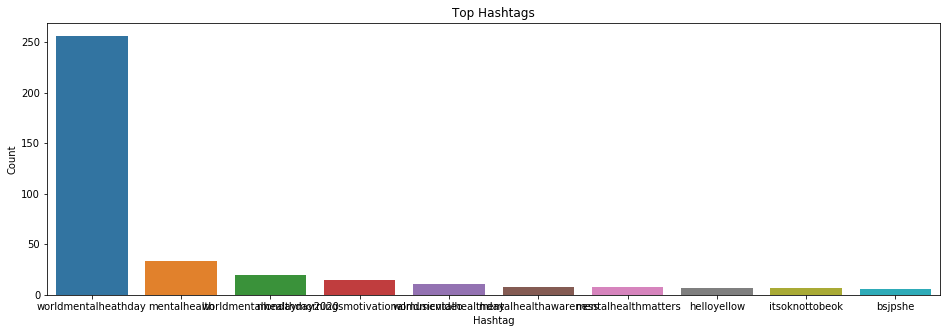

In [37]:
import seaborn as sns
a = nltk.FreqDist(tags_str)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Top Hashtags')
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('wmhd_top_hashtags.png', dpi=100)
plt.show()

In [39]:
hashtag_freq_list = d

In [40]:
hashtag_freq_list

,Hashtag,Count
0,worldmentalheathday,256
4,mentalhealth,33
32,worldmentalhealthday2020,20
54,mondaymorningsmotivationalmusicvideo,15
52,worldmentalhealthday,11
30,mentalhealthawareness,8
60,mentalhealthmatters,8
7,helloyellow,7
57,itsoknottobeok,7
6,bsjpshe,6


In [ ]:
# As the punctuations have been removed, now let's remove the stopwords from the words list 

In [41]:
import re
words_list = [re.sub(r'[^A-Za-z0-9]+','', x.lower()) for x in words_list] 

In [42]:
all_words = []
for m in words_list:
    if m != "":
        all_words.append(m)
        

In [43]:
len(all_words)

7587

In [44]:
import nltk
from nltk.corpus import stopwords
stp = stopwords.words('english')

In [45]:
filter_words = []

for i in all_words:
    if i in stp:
        pass
    else:
        filter_words.append(i)

In [46]:
len(filter_words)

4114

In [ ]:
# I did not use stemming to bring down the words to their root words because
# some of the stemmed words seemed not correct
# Hence I removed the idea of Stemming

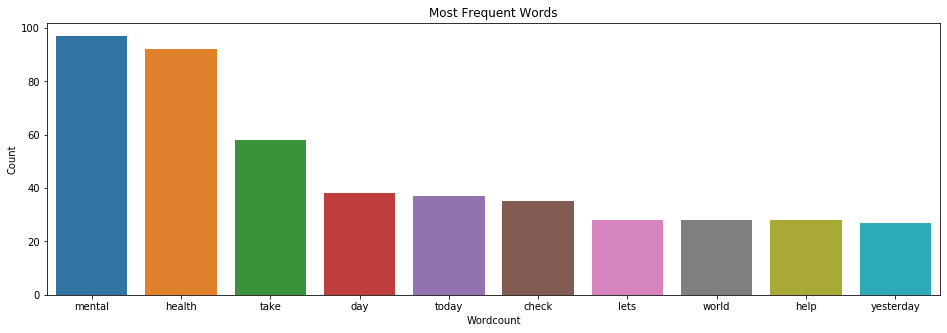

In [47]:
aa = nltk.FreqDist(filter_words)
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Most Frequent Words')
ax = sns.barplot(data=dd, x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('wmhd_all_freq.png', dpi=100)
plt.show()

In [49]:
wmhd_freq_list = dd

In [50]:
wmhd_freq_list

,Wordcount,Count
88,mental,97
89,health,92
369,take,58
91,day,38
303,today,37
224,check,35
154,lets,28
167,world,28
420,help,28
159,yesterday,27


In [51]:
wrdcld = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(filter_words))

# WORDCLOUD FOR ALL THE WORDS IN THE TWEETS

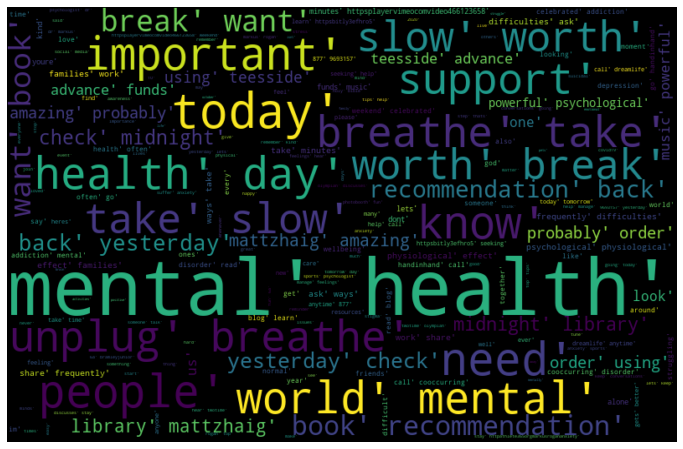

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wrdcld, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('wmhd_most_freq_wordcloud.png', dpi=100)
plt.show()